In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report 

In [22]:
d1 = pd.read_csv(r"E:\python\ML\exercises\ALCOHOL CONSUMPTION\student-mat.csv")
d2p = pd.read_csv("student-por.csv")
pd.set_option("display.max_column",None)

In [23]:
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [25]:
d2p.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [26]:
# data_mat[["school"]] == data_po[["school"]]

In [33]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [27]:
d3=pd.merge(d1,d2p,by=c("school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"))
print(nrow(d3)) # 382 students

NameError: name 'c' is not defined

In [30]:
d3 = pd.merge(d1,d2p, on = ["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_mat', '_po'))

In [31]:
d3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_po,traveltime_po,studytime_po,failures_po,schoolsup_po,famsup_po,paid_po,activities_po,higher_po,romantic_po,famrel_po,freetime_po,goout_po,Dalc_po,Walc_po,health_po,absences_po,G1_po,G2_po,G3_po
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,mother,2,2,0,yes,no,no,no,yes,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,father,1,2,0,no,yes,no,no,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,mother,1,2,0,yes,no,no,no,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,mother,1,3,0,no,yes,no,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,father,1,2,0,no,yes,no,no,yes,no,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,1,1,0,7,9,8,mother,1,2,0,no,yes,no,no,yes,no,4,3,4,1,1,1,4,15,15,16
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7
379,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,2,2,0,no,no,no,yes,yes,no,1,1,1,1,1,5,6,11,12,9
380,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,mother,2,1,0,no,no,no,no,yes,no,2,4,5,3,4,2,6,10,10,10


In [41]:
encoder = ["sex", "school", "address", "famsize", "Pstatus", "Mjob",'Fjob', 'reason', 'guardian_mat','schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat',"guardian_po",'schoolsup_po', 'famsup_po', 'paid_po', 'activities_po', 'higher_po',
       'romantic_po' ]

In [37]:
d3.query('traveltime_mat != traveltime_po')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_po,traveltime_po,studytime_po,failures_po,schoolsup_po,famsup_po,paid_po,activities_po,higher_po,romantic_po,famrel_po,freetime_po,goout_po,Dalc_po,Walc_po,health_po,absences_po,G1_po,G2_po,G3_po
79,GP,M,17,U,GT3,T,2,1,other,other,home,mother,2,1,3,yes,yes,no,yes,yes,no,yes,no,4,5,1,1,1,3,2,8,8,10,mother,1,1,0,no,yes,no,no,yes,no,5,4,5,1,2,5,22,9,7,6
80,GP,M,17,U,GT3,T,2,1,other,other,home,mother,1,1,3,no,yes,no,no,yes,yes,yes,no,5,4,5,1,2,5,0,5,0,0,mother,2,1,3,yes,yes,no,yes,no,no,4,5,1,1,1,3,0,9,9,10
280,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9,father,1,2,0,no,yes,no,yes,yes,no,4,3,3,2,2,2,0,12,12,13
281,GP,M,18,U,GT3,T,4,4,teacher,services,home,father,1,2,1,no,yes,no,yes,yes,yes,yes,no,4,3,3,2,2,2,0,10,10,0,mother,2,1,0,no,no,no,yes,yes,no,3,2,4,1,4,3,6,11,12,12
378,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,1,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,0,6,5,0,mother,3,2,2,no,no,no,yes,yes,yes,3,4,4,2,2,5,3,7,8,7


In [40]:
d3.query('guardian_po != guardian_mat')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian_mat,traveltime_mat,studytime_mat,failures_mat,schoolsup_mat,famsup_mat,paid_mat,activities_mat,nursery,higher_mat,internet,romantic_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,guardian_po,traveltime_po,studytime_po,failures_po,schoolsup_po,famsup_po,paid_po,activities_po,higher_po,romantic_po,famrel_po,freetime_po,goout_po,Dalc_po,Walc_po,health_po,absences_po,G1_po,G2_po,G3_po
111,GP,M,16,U,GT3,T,3,3,services,other,home,father,1,3,0,no,yes,no,yes,yes,yes,yes,no,5,3,3,1,1,5,2,16,18,18,mother,1,2,0,no,no,no,yes,yes,yes,4,2,3,1,2,3,0,11,12,13
112,GP,M,16,U,GT3,T,3,3,services,other,home,mother,1,2,0,no,no,yes,yes,yes,yes,yes,yes,4,2,3,1,2,3,2,12,13,12,father,1,3,0,no,yes,no,yes,yes,no,5,3,3,1,1,5,4,13,14,14
122,GP,M,16,U,GT3,T,4,4,teacher,teacher,course,father,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,4,1,2,5,2,15,15,16,mother,1,1,0,no,yes,no,no,no,yes,3,3,2,2,1,5,16,9,9,8
123,GP,M,16,U,GT3,T,4,4,teacher,teacher,course,mother,1,1,0,no,yes,no,no,yes,no,yes,yes,3,3,2,2,1,5,0,7,6,0,father,1,2,0,no,yes,no,yes,yes,no,5,4,4,1,2,5,6,16,14,14
280,GP,M,18,U,GT3,T,4,4,teacher,services,home,mother,2,1,0,no,no,yes,yes,yes,yes,yes,no,3,2,4,1,4,3,22,9,9,9,father,1,2,0,no,yes,no,yes,yes,no,4,3,3,2,2,2,0,12,12,13
281,GP,M,18,U,GT3,T,4,4,teacher,services,home,father,1,2,1,no,yes,no,yes,yes,yes,yes,no,4,3,3,2,2,2,0,10,10,0,mother,2,1,0,no,no,no,yes,yes,no,3,2,4,1,4,3,6,11,12,12


In [38]:
d3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_mat', 'traveltime_mat',
       'studytime_mat', 'failures_mat', 'schoolsup_mat', 'famsup_mat',
       'paid_mat', 'activities_mat', 'nursery', 'higher_mat', 'internet',
       'romantic_mat', 'famrel_mat', 'freetime_mat', 'goout_mat', 'Dalc_mat',
       'Walc_mat', 'health_mat', 'absences_mat', 'G1_mat', 'G2_mat', 'G3_mat',
       'guardian_po', 'traveltime_po', 'studytime_po', 'failures_po',
       'schoolsup_po', 'famsup_po', 'paid_po', 'activities_po', 'higher_po',
       'romantic_po', 'famrel_po', 'freetime_po', 'goout_po', 'Dalc_po',
       'Walc_po', 'health_po', 'absences_po', 'G1_po', 'G2_po', 'G3_po'],
      dtype='object')

In [39]:
d3.nunique()

school             2
sex                2
age                7
address            2
famsize            2
Pstatus            2
Medu               5
Fedu               5
Mjob               5
Fjob               5
reason             4
guardian_mat       3
traveltime_mat     4
studytime_mat      4
failures_mat       4
schoolsup_mat      2
famsup_mat         2
paid_mat           2
activities_mat     2
nursery            2
higher_mat         2
internet           2
romantic_mat       2
famrel_mat         5
freetime_mat       5
goout_mat          5
Dalc_mat           5
Walc_mat           5
health_mat         5
absences_mat      32
G1_mat            17
G2_mat            16
G3_mat            18
guardian_po        3
traveltime_po      4
studytime_po       4
failures_po        4
schoolsup_po       2
famsup_po          2
paid_po            2
activities_po      2
higher_po          2
romantic_po        2
famrel_po          5
freetime_po        5
goout_po           5
Dalc_po            5
Walc_po      

In [42]:
pd.get_dummies(data=d3, columns=encoder, drop_first=True)

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_po,studytime_po,failures_po,famrel_po,freetime_po,goout_po,Dalc_po,Walc_po,health_po,absences_po,G1_po,G2_po,G3_po,sex_M,school_MS,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mat_mother,guardian_mat_other,schoolsup_mat_yes,famsup_mat_yes,paid_mat_yes,activities_mat_yes,nursery_yes,higher_mat_yes,internet_yes,romantic_mat_yes,guardian_po_mother,guardian_po_other,schoolsup_po_yes,famsup_po_yes,paid_po_yes,activities_po_yes,higher_po_yes,romantic_po_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,2,2,0,4,3,4,1,1,3,4,0,11,11,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,1,2,0,5,3,3,1,1,3,2,9,11,11,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,1,2,0,4,3,2,2,3,3,6,12,13,12,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,1,3,0,3,2,2,1,1,5,0,14,14,14,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,1,1,1,1,0,0,1,0,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,1,2,0,4,3,2,1,2,5,0,11,13,13,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,18,3,1,1,2,0,4,3,4,1,1,1,0,7,9,8,1,2,0,4,3,4,1,1,1,4,15,15,16,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,0,1,0,0,1,0
378,18,1,1,2,2,1,1,1,1,1,1,5,0,6,5,0,3,2,2,3,4,4,2,2,5,3,7,8,7,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,1
379,18,1,1,2,2,1,1,1,1,1,1,5,0,6,5,0,2,2,0,1,1,1,1,1,5,6,11,12,9,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,0
380,17,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,2,1,0,2,4,5,3,4,2,6,10,10,10,1,1,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0


In [44]:
d3.describe()

,age,Medu,Fedu,traveltime_mat,studytime_mat,failures_mat,famrel_mat,freetime_mat,goout_mat,Dalc_mat,Walc_mat,health_mat,absences_mat,G1_mat,G2_mat,G3_mat,traveltime_po,studytime_po,failures_po,famrel_po,freetime_po,goout_po,Dalc_po,Walc_po,health_po,absences_po,G1_po,G2_po,G3_po
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<AxesSubplot:xlabel='absences_mat'>

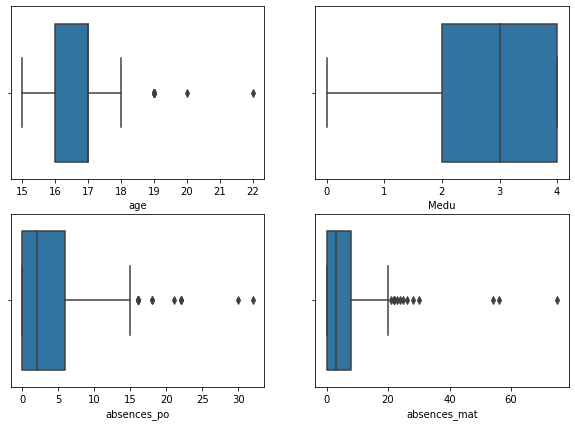

In [51]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.boxplot(x="age", data=d3)

plt.subplot(222)
sns.boxplot(x="Medu", data=d3)

plt.subplot(223)
sns.boxplot(x="absences_po", data=d3)

plt.subplot(224)
sns.boxplot(x="absences_mat", data=d3)

<AxesSubplot:xlabel='absences_mat', ylabel='Count'>

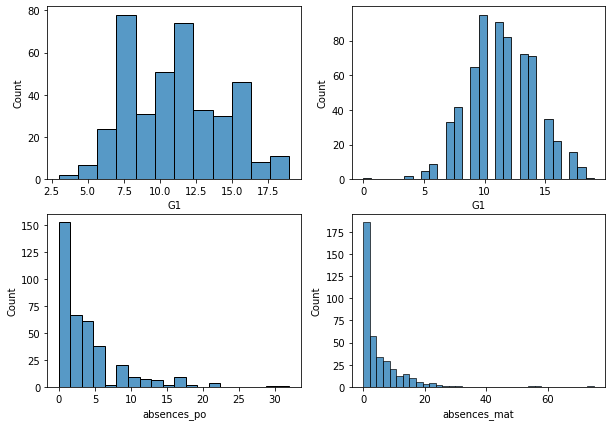

In [53]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.histplot(x="G1", data=d1)

plt.subplot(222)
sns.histplot(x="G1", data=d2p)

plt.subplot(223)
sns.histplot(x="absences_po", data=d3)

plt.subplot(224)
sns.histplot(x="absences_mat", data=d3)

<AxesSubplot:xlabel='G3_po', ylabel='Count'>

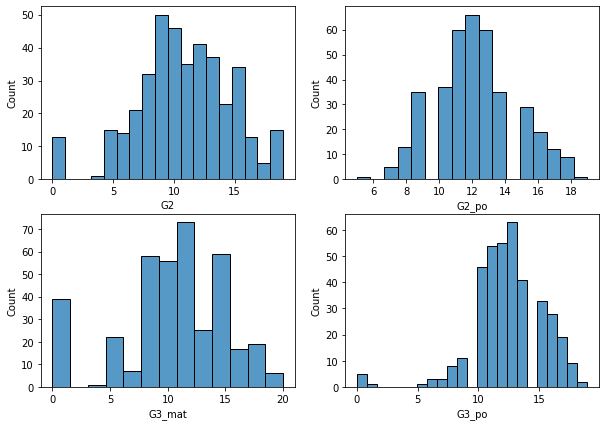

In [55]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.histplot(x="G2", data=d1)

plt.subplot(222)
sns.histplot(x="G2_po", data=d3)

plt.subplot(223)
sns.histplot(x="G3_mat", data=d3)

plt.subplot(224)
sns.histplot(x="G3_po", data=d3)

<AxesSubplot:>

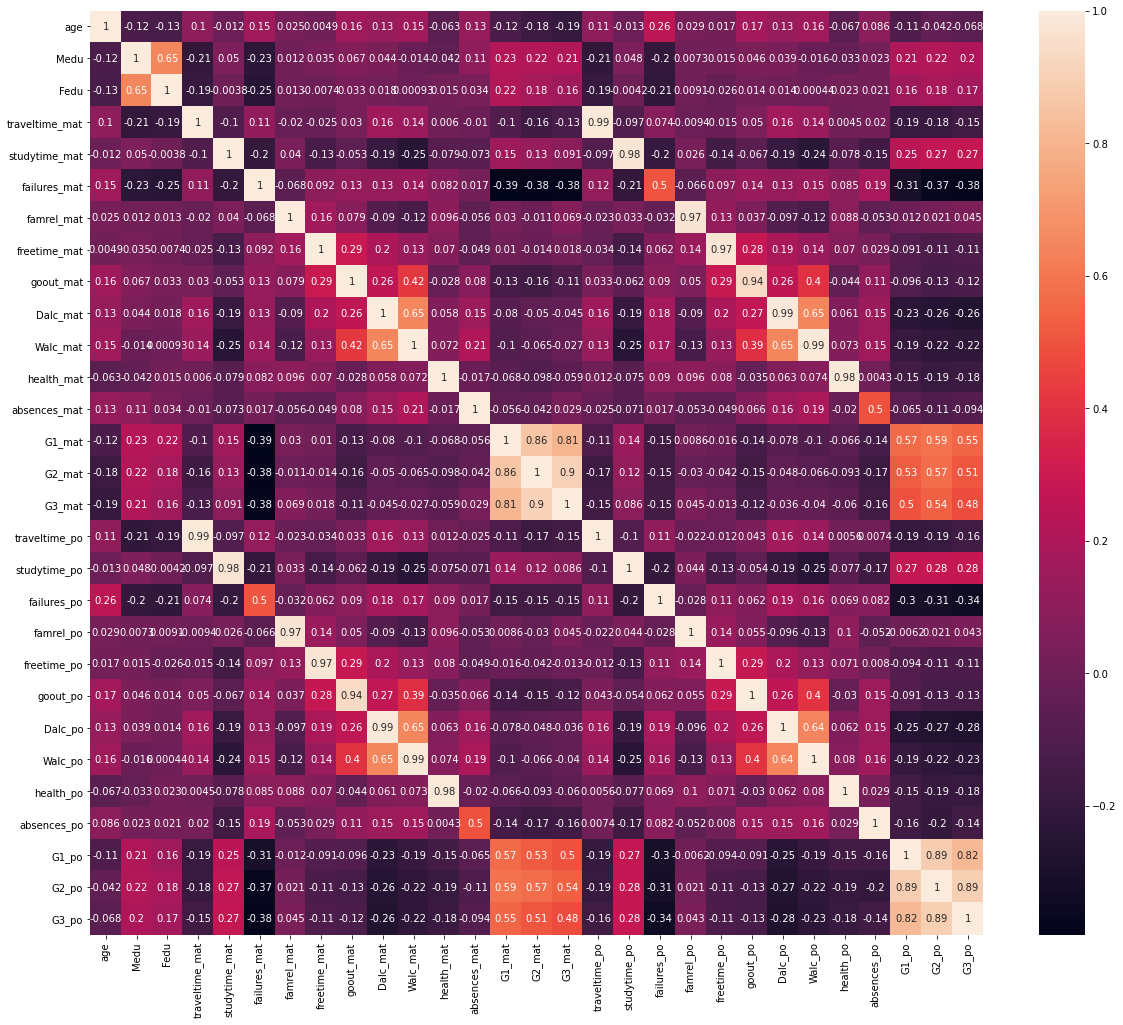

In [57]:
plt.figure(figsize=(20,17))
sns.heatmap(d3.corr(),annot=True)

<AxesSubplot:xlabel='studytime_mat', ylabel='G3_mat'>

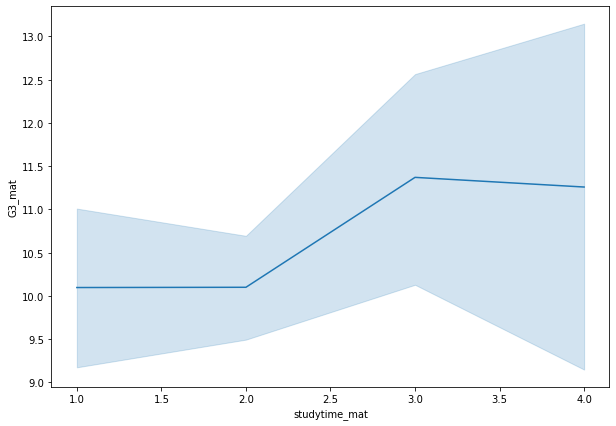

In [75]:
plt.figure(figsize=(10,7))
sns.lineplot(x="studytime_mat", y="G3_mat", data=d3)

<Figure size 1440x1224 with 0 Axes>

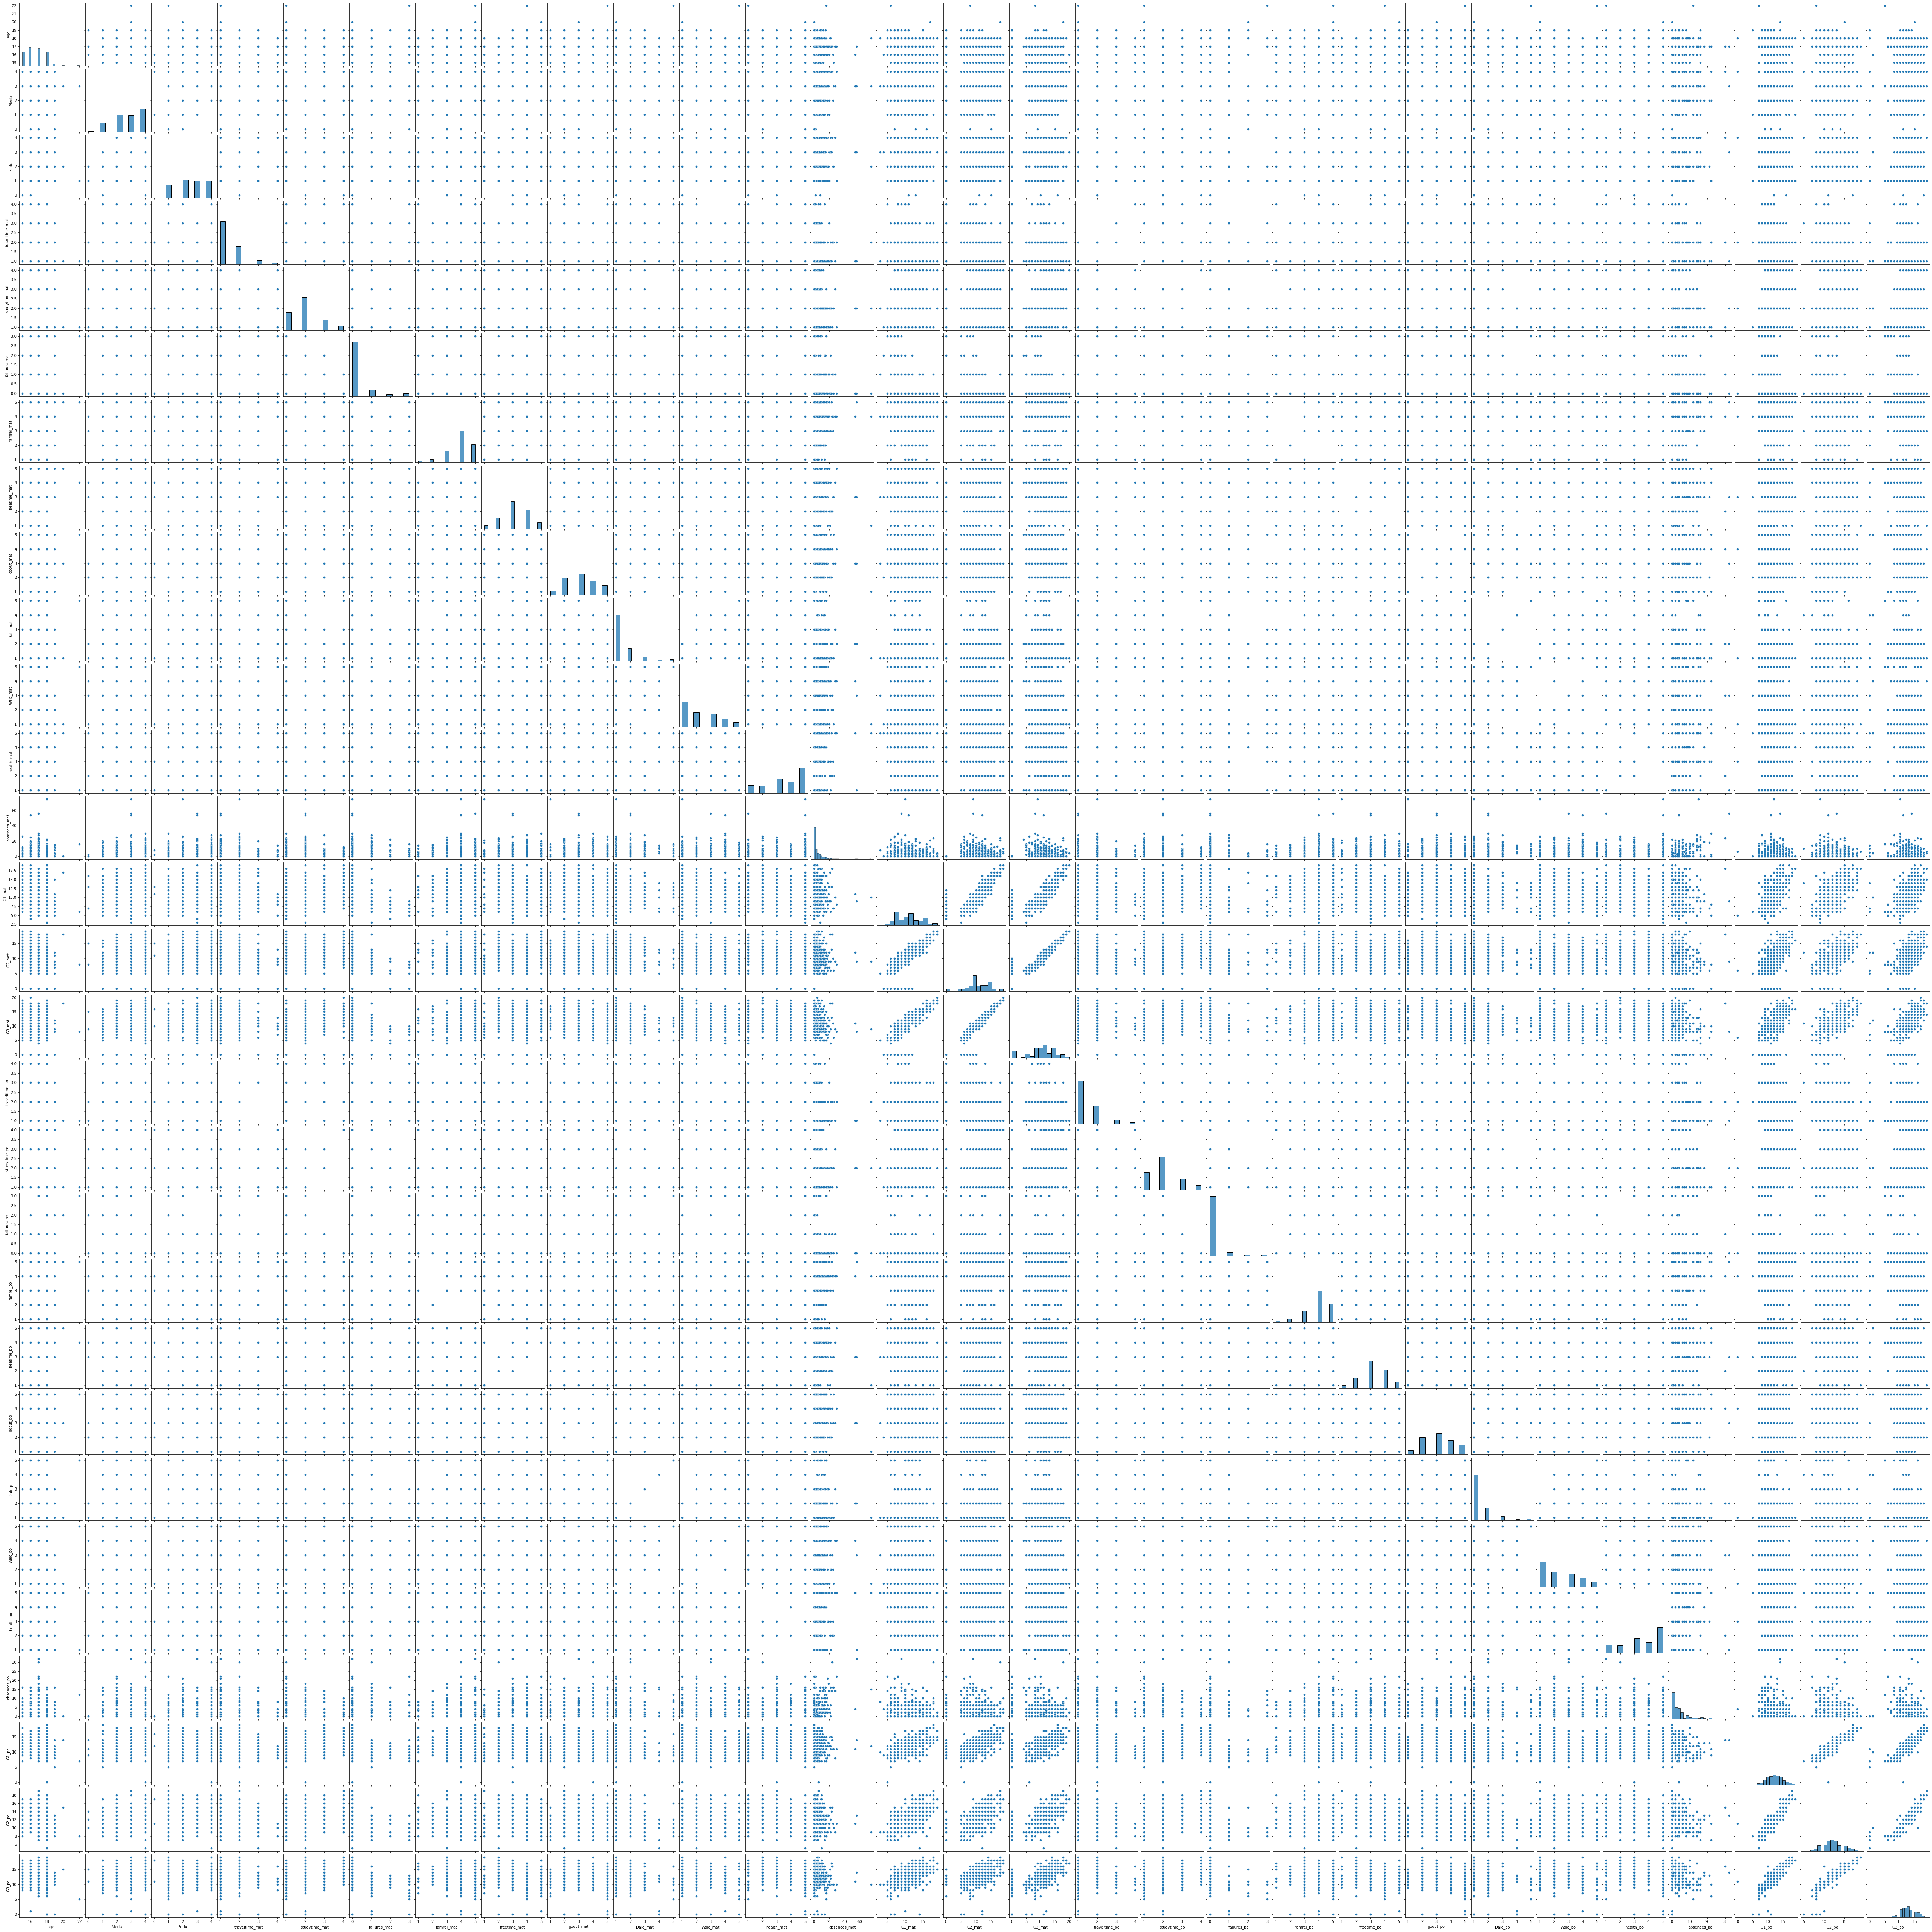

In [62]:
plt.figure(figsize=(20,17))
sns.pairplot(d3)

<Figure size 864x720 with 0 Axes>

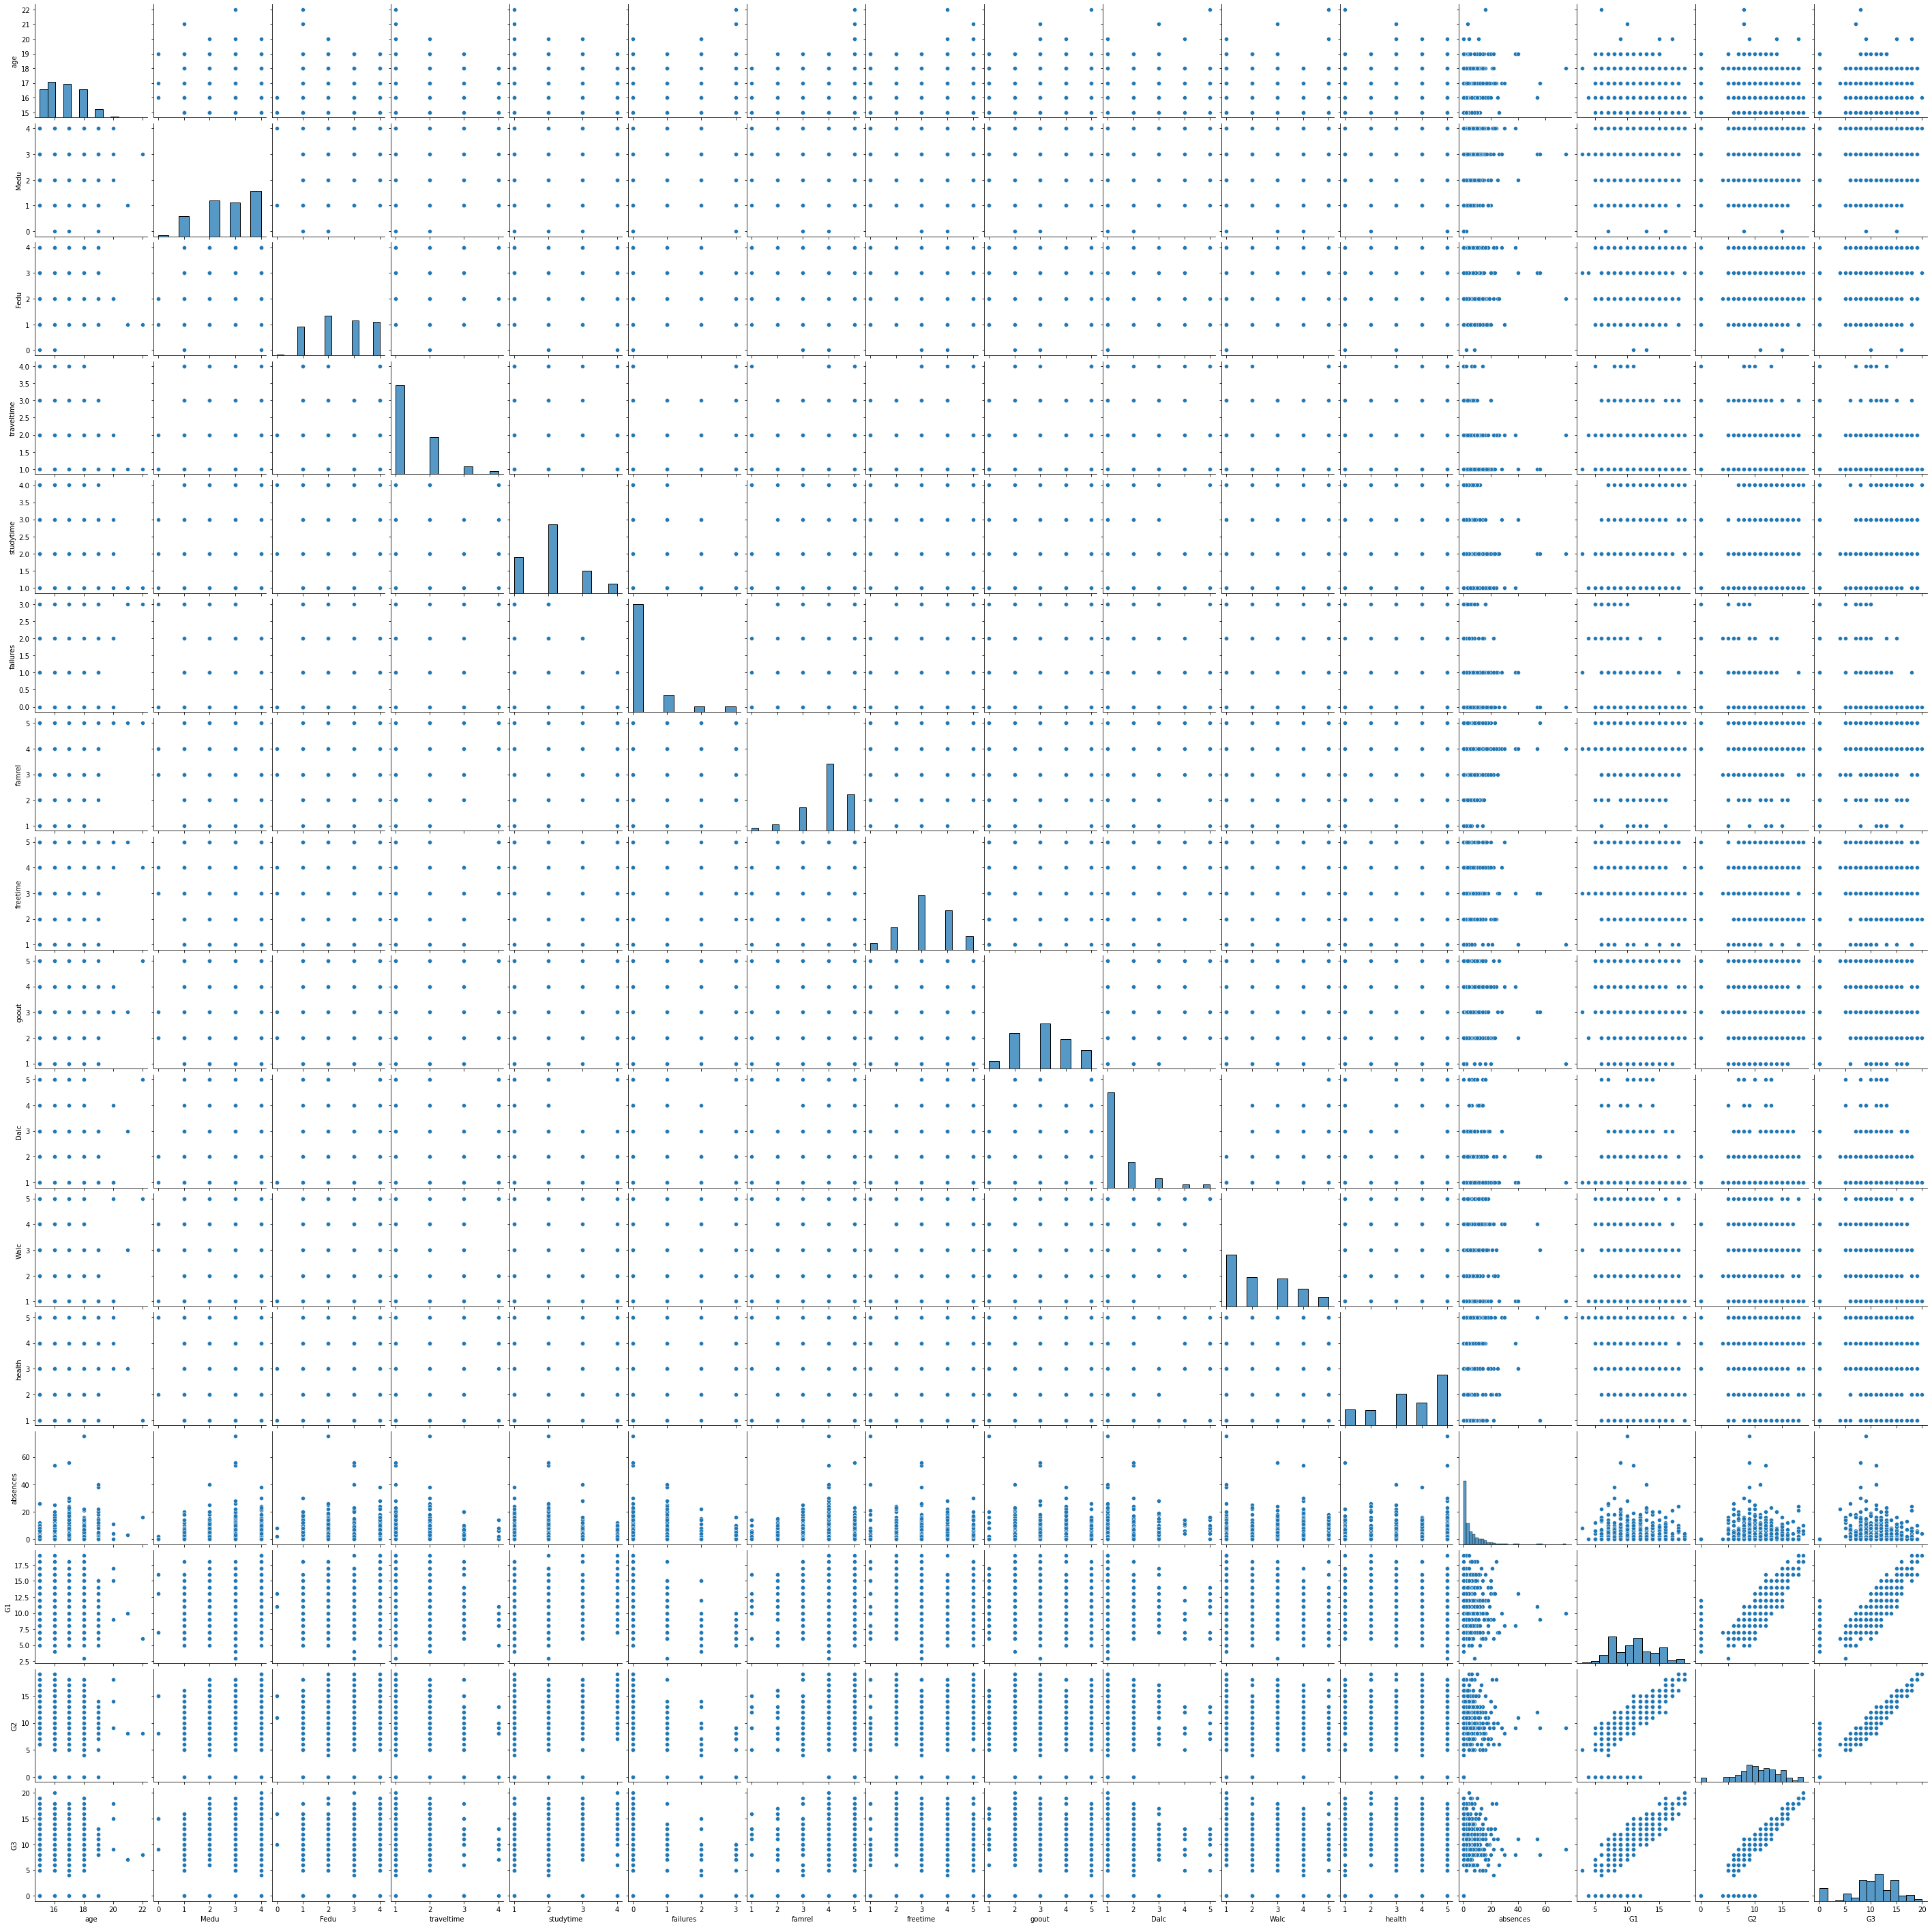

In [63]:
plt.figure(figsize=(12,10))
sns.pairplot(d1)

<Figure size 864x720 with 0 Axes>

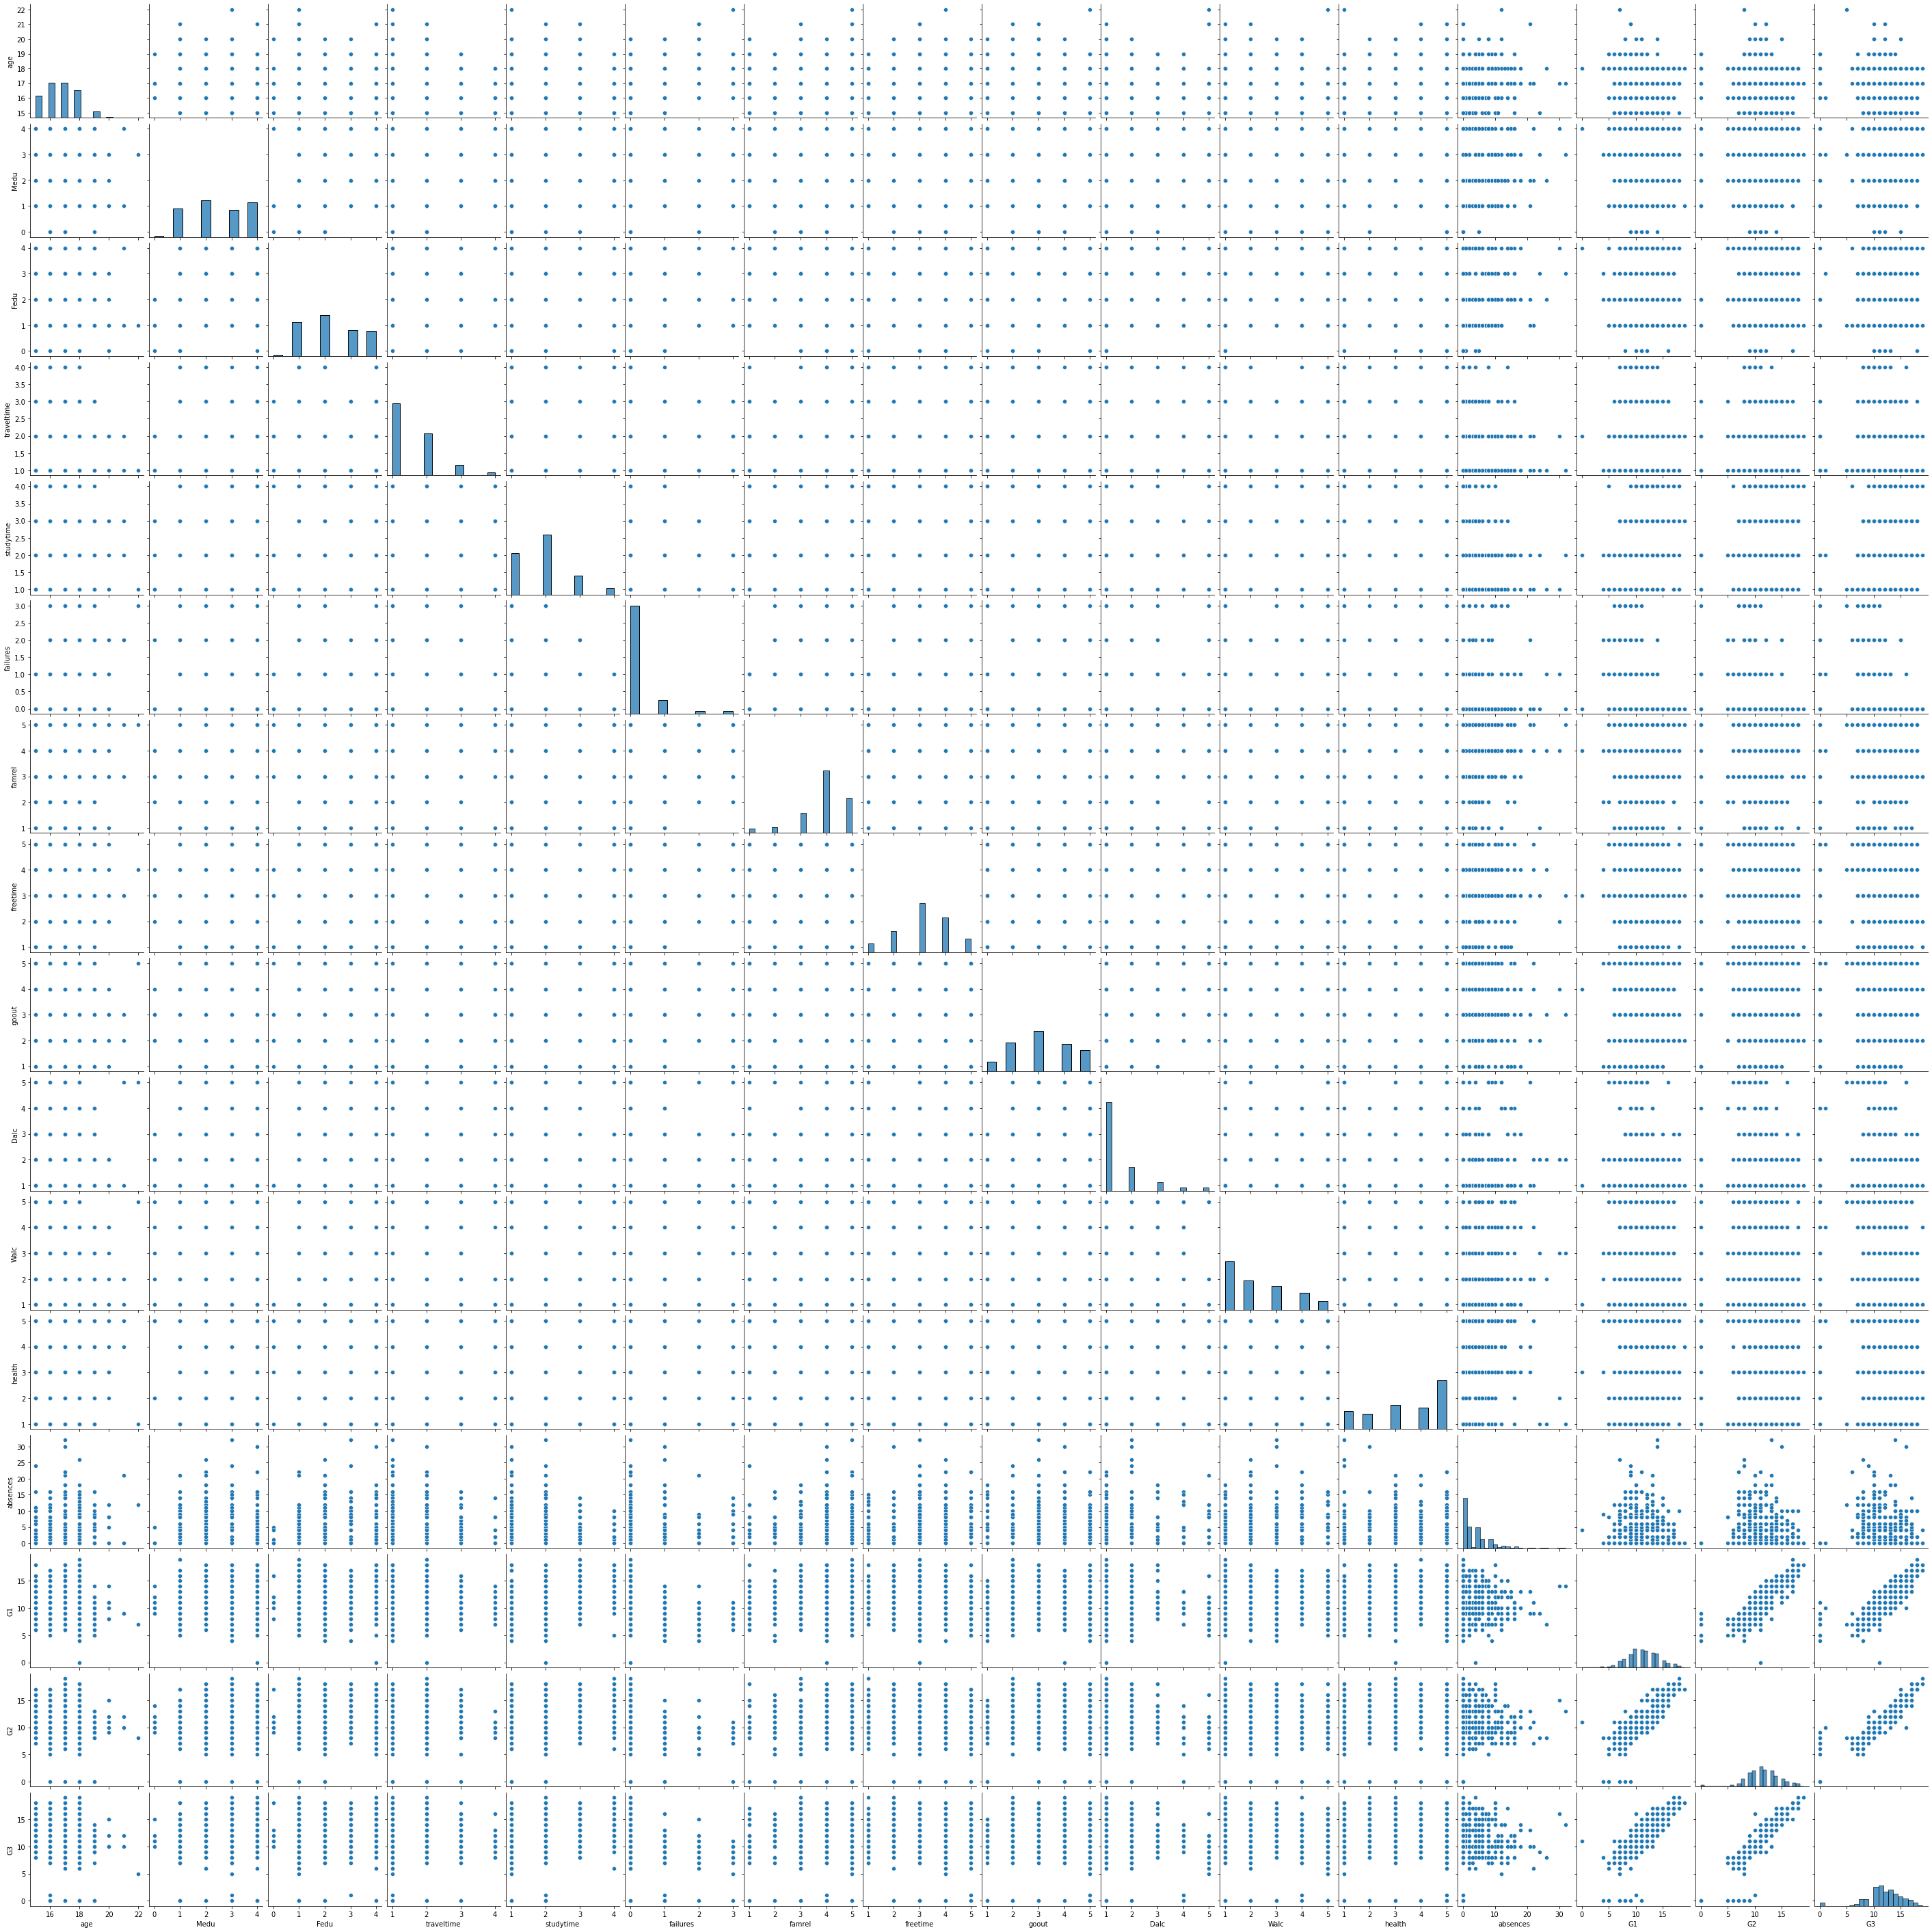

In [64]:
plt.figure(figsize=(12,10))
sns.pairplot(d2p)

In [ ]:
# d3.head(1)

<AxesSubplot:xlabel='Dalc_mat', ylabel='G2_mat'>

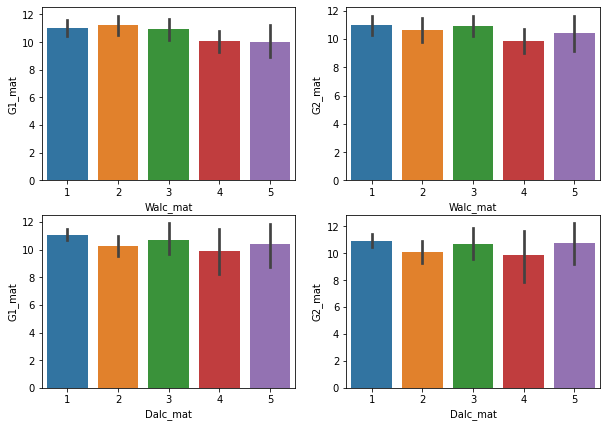

In [69]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.barplot(y="G1_mat",x="Walc_mat", data=d3)

plt.subplot(222)
sns.barplot(y="G2_mat",x="Walc_mat", data=d3)

plt.subplot(223)
sns.barplot(y="G1_mat",x="Dalc_mat", data=d3)

plt.subplot(224)
sns.barplot(y="G2_mat",x="Dalc_mat", data=d3)

<AxesSubplot:xlabel='Dalc_po', ylabel='G2_po'>

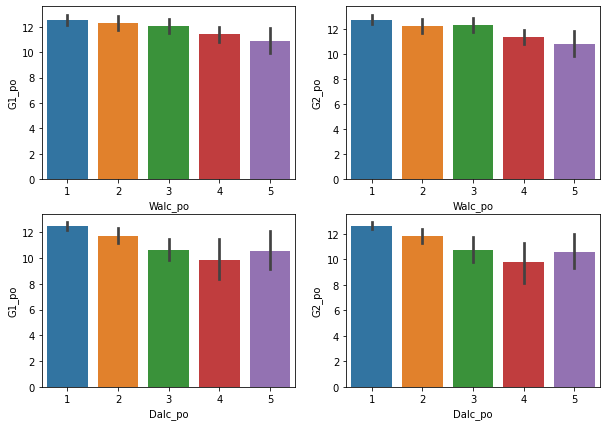

In [70]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.barplot(y="G1_po",x="Walc_po", data=d3)

plt.subplot(222)
sns.barplot(y="G2_po",x="Walc_po", data=d3)

plt.subplot(223)
sns.barplot(y="G1_po",x="Dalc_po", data=d3)

plt.subplot(224)
sns.barplot(y="G2_po",x="Dalc_po", data=d3)

<AxesSubplot:xlabel='goout_po', ylabel='G2_po'>

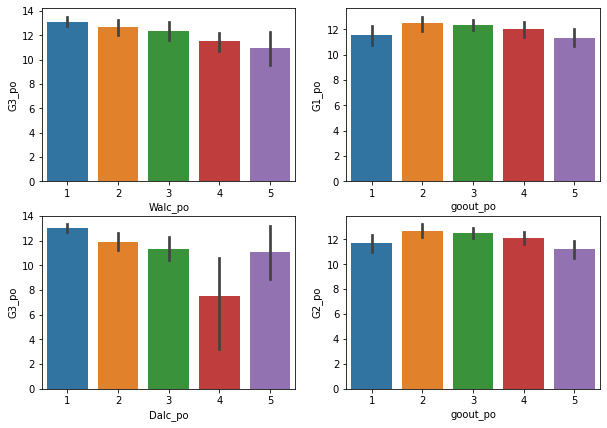

In [74]:
plt.figure(figsize=(10,7))
plt.subplot(221)
sns.barplot(y="G3_po",x="Walc_po", data=d3)

plt.subplot(222)
sns.barplot(y="G1_po",x="goout_po", data=d3)

plt.subplot(223)
sns.barplot(y="G3_po",x="Dalc_po", data=d3)

plt.subplot(224)
sns.barplot(y="G2_po",x="goout_po", data=d3)